# Loading State Boundaries

In [121]:
%pip install geopandas rasterio matplotlib --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
import geopandas as gpd
import pandas as pd
# Load the shapefile for India
india_map = gpd.read_file('India_State_Boundary.shp')

# Load your CSV file containing coordinates
#data = pd.read_csv('/content/addhar_centers.csv')
india_map.to_csv('state_polygons.csv')


# Loading District Boundaries

In [123]:
india_district_map= gpd.read_file('india_district_boundary\india_district_boundary.shp')

In [124]:
india_district_map

,STATE,DIST,geometry
0,ANDAMAN NICOBAR ISLANDS,NICOBAR,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2..."
1,ANDAMAN NICOBAR ISLANDS,SOUTH ANDAMAN,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10..."
2,ANDAMAN NICOBAR ISLANDS,NORTH AND MIDDLE ANDAMAN,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12..."
3,ANDHRA PRADESH,GUNTUR,"POLYGON ((80.81934 15.74265, 80.81973 15.74426..."
4,ANDHRA PRADESH,CHITTOOR,"POLYGON ((79.44446 13.88893, 79.45083 13.89174..."
...,...,...,...
713,WEST BENGAL,BANKURA,"POLYGON ((87.43880 23.41067, 87.44713 23.40539..."
714,WEST BENGAL,PASCHIM BARDHAMAN,"POLYGON ((87.50792 23.60127, 87.50733 23.58301..."
715,WEST BENGAL,PASHCHIM MEDINIPUR,"POLYGON ((87.23404 21.96042, 87.23706 21.96909..."
716,WEST BENGAL,SOUTH 24 PARGANAS,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."


## Loading Aadhar Locations

In [125]:
aadhar=pd.read_csv('addhar_centers.csv')
aadhar

,gid,state,lat,long
0,4233336,Maharashtra,17.0076,74.2615
1,4233337,Tamil Nadu,10.7886,79.1310
2,4233338,Karnataka,16.1655,74.8214
3,4233339,Andhra Pradesh,16.1849,81.1353
4,4233340,Tripura,23.9967,91.9957
...,...,...,...,...
75084,4233331,West Bengal,23.2393,87.0604
75085,4233332,Madhya Pradesh,23.1850,75.7768
75086,4233333,Kerala,9.8970,76.3088
75087,4233334,Himachal Pradesh,31.9713,77.1234


## Preprocessing Mumbo Jumbo

In [126]:
india_district_map['state'] = india_district_map['STATE'].apply(lambda x: x.lower() if isinstance(x, str) else x)
india_district_map.drop('STATE', axis=1, inplace=True)
# Display the DataFrame with lowercase strings
india_district_map['state'].unique()

array(['andaman   nicobar islands', 'andhra pradesh', 'arunachal pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra and nagar haveli and daman and diu', 'daman   diu', 'goa',
       'gujarat', 'haryana', 'himachal pradesh', 'jammu   kashmir',
       'jharkhand', 'karnataka', 'kerala', 'lakshadweep',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'nct of delhi', 'odisha', 'puducherry', 'punjab',
       'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura',
       'uttarakhand', 'uttar pradesh', 'west bengal'], dtype=object)

In [127]:
#aadhar.drop('gid', axis=1, inplace=True)
print(aadhar['state'].unique())

['Maharashtra' 'Tamil Nadu' 'Karnataka' 'Andhra Pradesh' 'Tripura'
 'Uttar Pradesh' 'Haryana' 'Himachal Pradesh' 'Kerala' 'Odisha'
 'West Bengal' 'Rajasthan' 'Telangana' 'Punjab' 'Gujarat' 'Jharkhand'
 'Delhi' 'Bihar' 'Madhya Pradesh' 'Mizoram' 'Assam' 'Jammu and Kashmir'
 'Dadra and Nagar Haveli' 'Uttarakhand' 'Chhattisgarh' 'Goa' 'Manipur'
 'Puducherry' 'Sikkim' 'Chandigarh' 'Nagaland' 'Daman and Diu' 'Ladakh'
 'Andaman and Nicobar Islands' 'Arunachal Pradesh' 'Meghalaya'
 'Lakshadweep']


Below is garbage

In [128]:
combined = pd.merge(india_district_map, aadhar, on='state', how="outer")

combined.to_csv('combined.csv')

In [129]:
combined.isnull().sum() 

DIST        75089
geometry    75089
state           0
gid           718
lat           718
long          718
dtype: int64

Garbage ends here 


# Mapping for Maharashtra

In [130]:
maharashtra=aadhar[aadhar['state']=='Jammu and Kashmir']
maharashtra

,gid,state,lat,long
127,4233463,Jammu and Kashmir,33.3489,75.8848
258,4233594,Jammu and Kashmir,34.5231,74.0888
294,4233630,Jammu and Kashmir,33.3731,74.3089
523,4233858,Jammu and Kashmir,33.6243,75.3732
525,4233860,Jammu and Kashmir,34.0715,74.8235
...,...,...,...,...
74145,4232394,Jammu and Kashmir,32.6435,75.3875
74288,4232537,Jammu and Kashmir,34.1745,74.6657
74419,4232668,Jammu and Kashmir,32.3668,75.5213
74900,4233147,Jammu and Kashmir,33.6451,75.0094


In [131]:
india_district_map

,DIST,geometry,state
0,NICOBAR,"MULTIPOLYGON (((93.70408 7.20940, 93.69913 7.2...",andaman nicobar islands
1,SOUTH ANDAMAN,"MULTIPOLYGON (((92.59021 10.76266, 92.58887 10...",andaman nicobar islands
2,NORTH AND MIDDLE ANDAMAN,"MULTIPOLYGON (((92.76555 12.28549, 92.76444 12...",andaman nicobar islands
3,GUNTUR,"POLYGON ((80.81934 15.74265, 80.81973 15.74426...",andhra pradesh
4,CHITTOOR,"POLYGON ((79.44446 13.88893, 79.45083 13.89174...",andhra pradesh
...,...,...,...
713,BANKURA,"POLYGON ((87.43880 23.41067, 87.44713 23.40539...",west bengal
714,PASCHIM BARDHAMAN,"POLYGON ((87.50792 23.60127, 87.50733 23.58301...",west bengal
715,PASHCHIM MEDINIPUR,"POLYGON ((87.23404 21.96042, 87.23706 21.96909...",west bengal
716,SOUTH 24 PARGANAS,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",west bengal


In [132]:
maha_district_map=india_district_map[india_district_map['state']=='jammu   kashmir']
maha_district_map

,DIST,geometry,state
207,UDHAMPUR,"POLYGON ((75.11911 33.18959, 75.12717 33.18786...",jammu kashmir
208,SHUPIYAN,"POLYGON ((75.04478 33.79885, 75.04440 33.79522...",jammu kashmir
209,DATA NOT AVAILABLE,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",jammu kashmir
210,RAMBAN,"POLYGON ((75.14156 33.52499, 75.14374 33.52417...",jammu kashmir
211,KARGIL,"POLYGON ((76.40975 34.91046, 76.41306 34.90600...",jammu kashmir
212,JAMMU,"POLYGON ((75.00165 32.90360, 75.00244 32.90325...",jammu kashmir
213,SAMBA,"POLYGON ((75.14372 32.73973, 75.14501 32.73801...",jammu kashmir
214,ANANTNAG,"POLYGON ((75.49663 34.23444, 75.49792 34.23507...",jammu kashmir
215,GANDERBAL,"POLYGON ((75.33679 34.36181, 75.33755 34.36429...",jammu kashmir
216,KATHUA,"POLYGON ((75.71636 32.88024, 75.71932 32.88001...",jammu kashmir


In [133]:
from shapely.geometry import Point

# Create a GeoDataFrame from the CSV data
geometry = [Point(xy) for xy in zip(maharashtra.long, maharashtra.lat)]
geo_df = gpd.GeoDataFrame(maharashtra, geometry=geometry, crs=maha_district_map.crs)


In [134]:
geo_df

,gid,state,lat,long,geometry
127,4233463,Jammu and Kashmir,33.3489,75.8848,POINT (75.88480 33.34890)
258,4233594,Jammu and Kashmir,34.5231,74.0888,POINT (74.08880 34.52310)
294,4233630,Jammu and Kashmir,33.3731,74.3089,POINT (74.30890 33.37310)
523,4233858,Jammu and Kashmir,33.6243,75.3732,POINT (75.37320 33.62430)
525,4233860,Jammu and Kashmir,34.0715,74.8235,POINT (74.82350 34.07150)
...,...,...,...,...,...
74145,4232394,Jammu and Kashmir,32.6435,75.3875,POINT (75.38750 32.64350)
74288,4232537,Jammu and Kashmir,34.1745,74.6657,POINT (74.66570 34.17450)
74419,4232668,Jammu and Kashmir,32.3668,75.5213,POINT (75.52130 32.36680)
74900,4233147,Jammu and Kashmir,33.6451,75.0094,POINT (75.00940 33.64510)


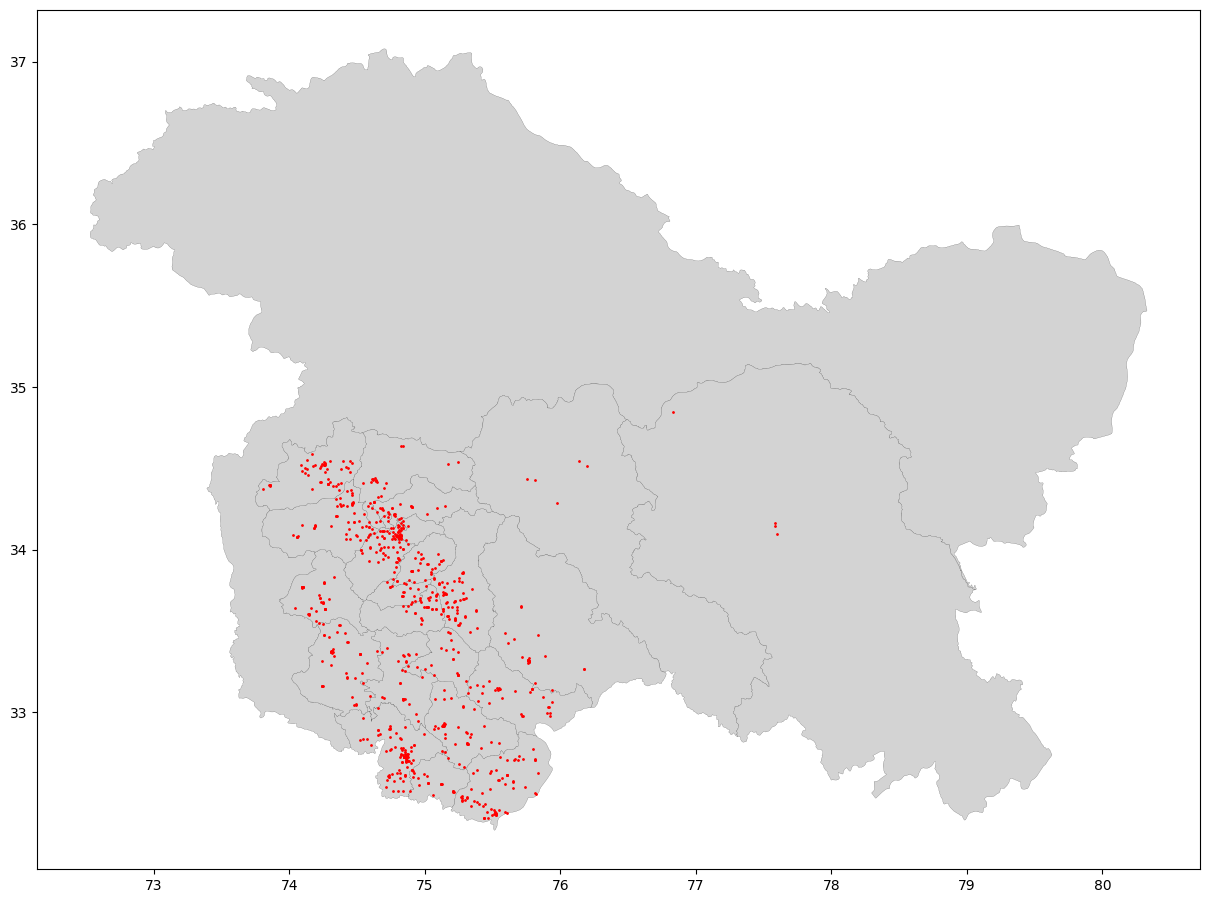

In [135]:
import matplotlib.pyplot as plt

# Plot the map of India
fig, ax = plt.subplots(figsize=(15, 15))
maha_district_map.plot(ax=ax,edgecolor='black', linewidth=0.1 , color='lightgray')

# Plot the points on the map
geo_df.plot(ax=ax, color='red', marker='o', markersize=1)

# Show the plot
plt.show()


TODO
- ~~Map Districts into states~~
- ~~Create a Heatmap of Aadhar centers per district~~
- Census Population Data in each District
- Tif Image in each state


On the quest to make Heatmap

In [136]:
# Load the shapefile containing district boundaries
maha_districts= maha_district_map.drop('state', axis=1)

# Calculate KDE for each district
maha_districts


,DIST,geometry
207,UDHAMPUR,"POLYGON ((75.11911 33.18959, 75.12717 33.18786..."
208,SHUPIYAN,"POLYGON ((75.04478 33.79885, 75.04440 33.79522..."
209,DATA NOT AVAILABLE,"POLYGON ((74.73451 37.02068, 74.73647 37.01937..."
210,RAMBAN,"POLYGON ((75.14156 33.52499, 75.14374 33.52417..."
211,KARGIL,"POLYGON ((76.40975 34.91046, 76.41306 34.90600..."
212,JAMMU,"POLYGON ((75.00165 32.90360, 75.00244 32.90325..."
213,SAMBA,"POLYGON ((75.14372 32.73973, 75.14501 32.73801..."
214,ANANTNAG,"POLYGON ((75.49663 34.23444, 75.49792 34.23507..."
215,GANDERBAL,"POLYGON ((75.33679 34.36181, 75.33755 34.36429..."
216,KATHUA,"POLYGON ((75.71636 32.88024, 75.71932 32.88001..."


In [137]:
geo_df

,gid,state,lat,long,geometry
127,4233463,Jammu and Kashmir,33.3489,75.8848,POINT (75.88480 33.34890)
258,4233594,Jammu and Kashmir,34.5231,74.0888,POINT (74.08880 34.52310)
294,4233630,Jammu and Kashmir,33.3731,74.3089,POINT (74.30890 33.37310)
523,4233858,Jammu and Kashmir,33.6243,75.3732,POINT (75.37320 33.62430)
525,4233860,Jammu and Kashmir,34.0715,74.8235,POINT (74.82350 34.07150)
...,...,...,...,...,...
74145,4232394,Jammu and Kashmir,32.6435,75.3875,POINT (75.38750 32.64350)
74288,4232537,Jammu and Kashmir,34.1745,74.6657,POINT (74.66570 34.17450)
74419,4232668,Jammu and Kashmir,32.3668,75.5213,POINT (75.52130 32.36680)
74900,4233147,Jammu and Kashmir,33.6451,75.0094,POINT (75.00940 33.64510)


In [138]:
df= pd.read_csv('jnk_districtwise_population.csv')


In [139]:
df['DIST'] = df['District Name'].str.lower()
#df.drop('District Name ', axis=1, inplace=True)
maha_districts['DIST'] = maha_districts['DIST'].str.lower()
df['DIST'].unique()


array(['anantnag', 'badgam', 'bandipora', 'baramula', 'doda', 'ganderbal',
       'jammu', 'kargil', 'kathua', 'kishtwar', 'kulgam', 'kupwara',
       'ladakh(leh)', 'pulwama', 'punch', 'rajouri', 'ramban', 'reasi',
       'samba', 'shupiyan', 'srinagar', 'udhampur'], dtype=object)

In [140]:
maha_districts['DIST'].unique()

array(['udhampur', 'shupiyan', 'data not available', 'ramban', 'kargil',
       'jammu', 'samba', 'anantnag', 'ganderbal', 'kathua', 'reasi',
       'rajauri', 'punch', 'badgam', 'pulwama', 'srinagar', 'kishtwar',
       'baramula', 'bandipore', 'ladakh(leh)', 'kupwara', 'kulgam',
       'doda'], dtype=object)

In [141]:
merged_df = maha_districts.merge(df, left_on='DIST', right_on='DIST', how='left')
merged_df

,DIST,geometry,S.No.,District Name,Estimated Population in 2023
0,udhampur,"POLYGON ((75.11911 33.18959, 75.12717 33.18786...",22.0,Udhampur,663762.0
1,shupiyan,"POLYGON ((75.04478 33.79885, 75.04440 33.79522...",20.0,Shupiyan,318393.0
2,data not available,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",NaN,NaN,NaN
3,ramban,"POLYGON ((75.14156 33.52499, 75.14374 33.52417...",17.0,Ramban,339321.0
4,kargil,"POLYGON ((76.40975 34.91046, 76.41306 34.90600...",8.0,Kargil,168399.0
5,jammu,"POLYGON ((75.00165 32.90360, 75.00244 32.90325...",7.0,Jammu,1829830.0
6,samba,"POLYGON ((75.14372 32.73973, 75.14501 32.73801...",19.0,Samba,381402.0
7,anantnag,"POLYGON ((75.49663 34.23444, 75.49792 34.23507...",1.0,Anantnag,1290116.0
8,ganderbal,"POLYGON ((75.33679 34.36181, 75.33755 34.36429...",6.0,Ganderbal,355745.0
9,kathua,"POLYGON ((75.71636 32.88024, 75.71932 32.88001...",9.0,Kathua,737256.0


In [142]:
joined = gpd.sjoin(geo_df, maha_districts, op='within')
joined


C:\Users\utfu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,gid,state,lat,long,geometry,index_right,DIST
127,4233463,Jammu and Kashmir,33.3489,75.8848,POINT (75.88480 33.34890),223,kishtwar
9424,4242726,Jammu and Kashmir,33.3128,75.7625,POINT (75.76250 33.31280),223,kishtwar
11641,4244941,Jammu and Kashmir,33.3236,75.7618,POINT (75.76180 33.32360),223,kishtwar
12552,4245848,Jammu and Kashmir,33.4771,75.8337,POINT (75.83370 33.47710),223,kishtwar
14924,4248218,Jammu and Kashmir,33.4898,75.5936,POINT (75.59360 33.48980),223,kishtwar
...,...,...,...,...,...,...,...
40463,4273617,Jammu and Kashmir,34.5469,76.1392,POINT (76.13920 34.54690),211,kargil
41123,4274370,Jammu and Kashmir,34.5127,76.1930,POINT (76.19300 34.51270),211,kargil
41170,4274446,Jammu and Kashmir,34.2881,75.9726,POINT (75.97260 34.28810),211,kargil
41257,4274561,Jammu and Kashmir,34.4290,75.8137,POINT (75.81370 34.42900),211,kargil


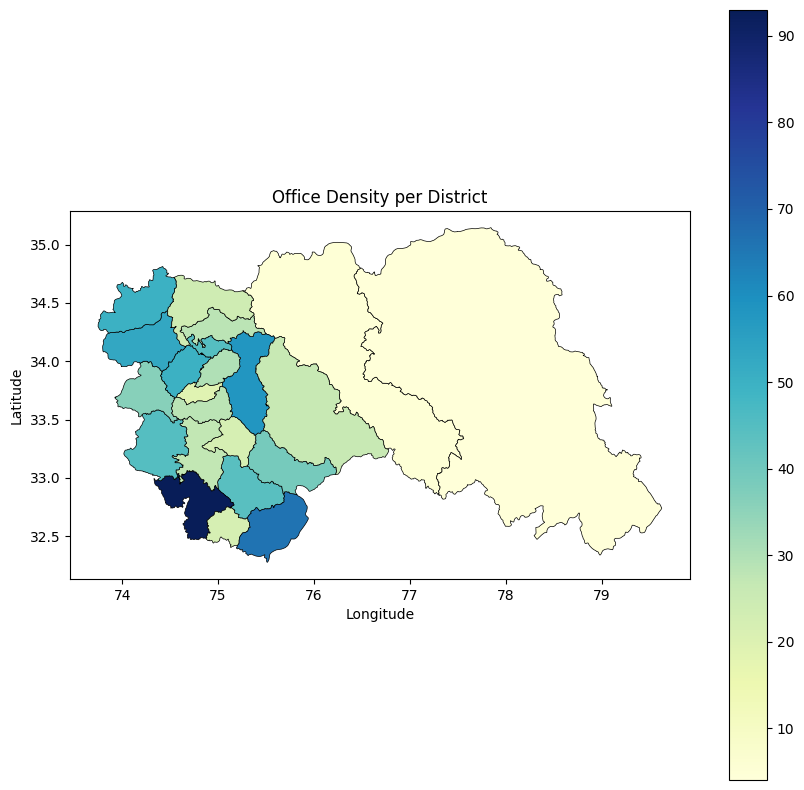

In [143]:
office_counts = joined.groupby('DIST').size().reset_index(name='office_count')

# Merge counts with district boundaries GeoDataFrame
districts_with_counts = maha_districts.merge(office_counts, how='left', left_on='DIST', right_on='DIST')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 10))
districts_with_counts.plot(column='office_count', cmap='YlGnBu', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

# Set plot title and labels
plt.title('Office Density per District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [144]:
districts_with_counts['DIST'] = districts_with_counts['DIST'].str.lower()
districts_with_counts= districts_with_counts.merge(df, how='left', left_on='DIST', right_on='DIST')
districts_with_counts

,DIST,geometry,office_count,S.No.,District Name,Estimated Population in 2023
0,udhampur,"POLYGON ((75.11911 33.18959, 75.12717 33.18786...",44.0,22.0,Udhampur,663762.0
1,shupiyan,"POLYGON ((75.04478 33.79885, 75.04440 33.79522...",19.0,20.0,Shupiyan,318393.0
2,data not available,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",NaN,NaN,NaN,NaN
3,ramban,"POLYGON ((75.14156 33.52499, 75.14374 33.52417...",22.0,17.0,Ramban,339321.0
4,kargil,"POLYGON ((76.40975 34.91046, 76.41306 34.90600...",5.0,8.0,Kargil,168399.0
5,jammu,"POLYGON ((75.00165 32.90360, 75.00244 32.90325...",93.0,7.0,Jammu,1829830.0
6,samba,"POLYGON ((75.14372 32.73973, 75.14501 32.73801...",22.0,19.0,Samba,381402.0
7,anantnag,"POLYGON ((75.49663 34.23444, 75.49792 34.23507...",58.0,1.0,Anantnag,1290116.0
8,ganderbal,"POLYGON ((75.33679 34.36181, 75.33755 34.36429...",28.0,6.0,Ganderbal,355745.0
9,kathua,"POLYGON ((75.71636 32.88024, 75.71932 32.88001...",66.0,9.0,Kathua,737256.0


In [145]:
districts_with_counts['office_count']
districts_with_counts['Center_Busyness'] = districts_with_counts['office_count'] / districts_with_counts['Estimated Population in 2023']
districts_with_counts.fillna(0, inplace=True)

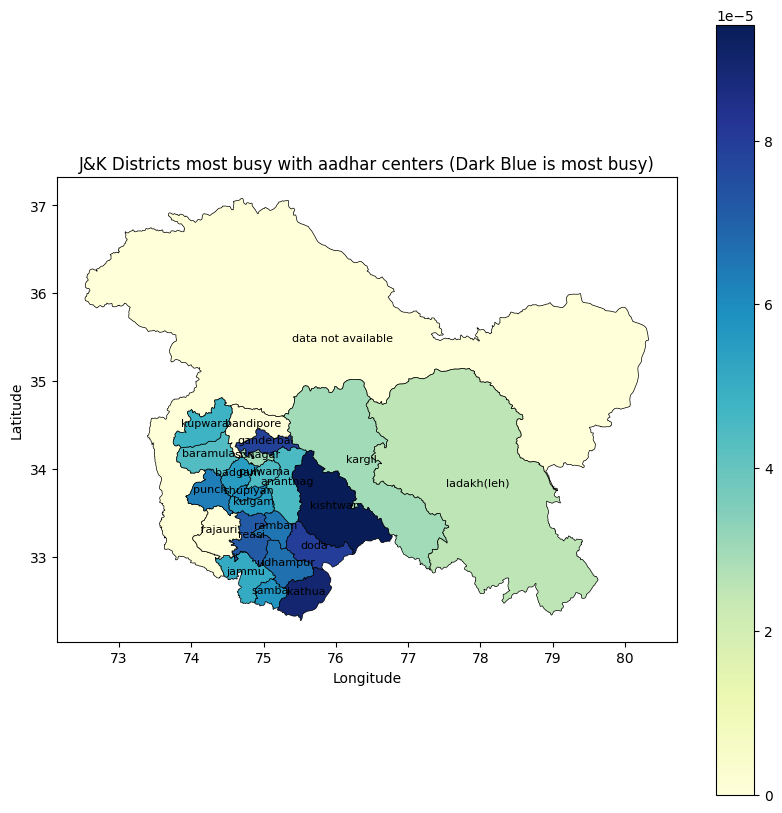

In [146]:
fig, ax = plt.subplots(figsize=(10, 10))
districts_with_counts.plot(column='Center_Busyness', cmap='YlGnBu', linewidth=0.5, ax=ax, edgecolor='black', legend=True)
for idx, row in districts_with_counts.iterrows():
    # Adjust the label position (here using centroid of the geometry) for better visibility
    label_position = (row.geometry.centroid.x, row.geometry.centroid.y)
    
    # Add district labels to the plot
    ax.annotate(text=row['DIST'], xy=label_position, horizontalalignment='center', fontsize=8, color='black')
# Set plot title and labels
plt.title('J&K Districts most busy with aadhar centers (Dark Blue is most busy)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [147]:
districts_with_counts.to_csv('districts_with_counts.csv')

In [148]:
districts_with_counts.dropna(inplace=True)
districts_with_counts.to_csv('districts_with_counts.csv')

Raster Data Working

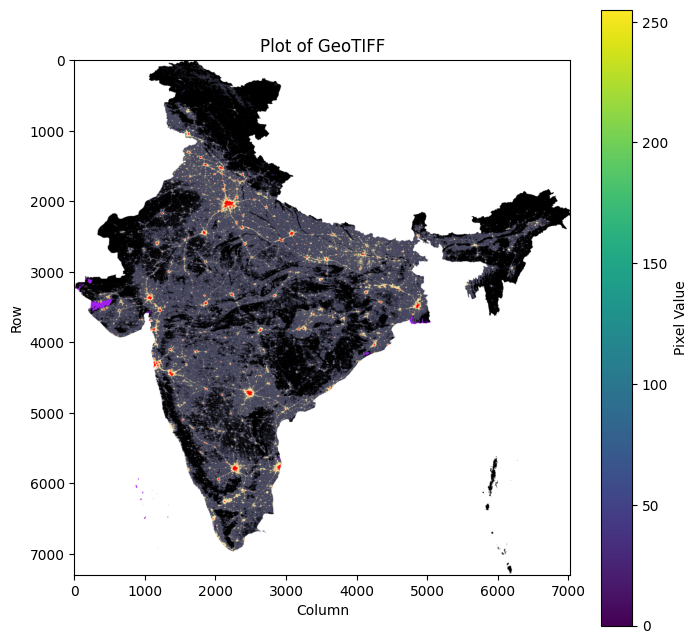

In [149]:
import rasterio
import matplotlib.pyplot as plt

# Open the TIF file (Replace 'india.tif' with the actual file path)
with rasterio.open('2022_India.tif') as src:
    india_image = src.read()  # Load the image
    metadata = src.meta 
    raster_crs = src.crs
    plt.figure(figsize=(8, 8))
    plt.imshow(india_image.transpose(1, 2, 0))  # Adjust the colormap as needed
    plt.colorbar(label='Pixel Value')  # Add colorbar indicating pixel values
    plt.title('Plot of GeoTIFF')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

    # Get metadata (such as CRS, transform)


In [150]:
metadata

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 7033,
 'height': 7294,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.004166666666666666, 0.0, 68.10845540364583,
        0.0, -0.004166666666666667, 37.0751220703125)}

## Plotting All the Shapes individually inside the tif file

In [151]:
import fiona
from shapely.geometry import shape
from rasterio.warp import transform_geom
from rasterio.mask import mask
# Open the shapefile containing state boundaries

with fiona.open("India_State_Boundary.shp", "r") as shapefile:
    # Read the raster image
    with rasterio.open("2022_India.tif") as src:  # Replace with your raster file path
        raster_crs = src.crs
        metadata = src.meta

        # Loop through each feature in the shapefile
        for feature in shapefile:
            # Convert the geometry to the raster CRS
            geom = shape(feature["geometry"])
            reprojected_geom = transform_geom(shapefile.crs, raster_crs, geom)

            # Mask the raster image using the transformed geometry
            masked_image, _ = mask(src, [reprojected_geom], crop=True)
            plt.figure(figsize=(15, 15))
            plt.imshow(masked_image.transpose((1, 2, 0)))  # Adjust the colormap as needed
            plt.colorbar(label='Pixel Value')  # Add colorbar indicating pixel values
            plt.title(f"Masked Image for {feature['properties']['State_Name']}, ")
            plt.xlabel('Column')
            plt.ylabel('Row')
            output_path_img = f"state_ntl/plot_{feature['properties']['State_Name']}.png"
            plt.savefig(output_path_img)
            plt.show()
            plt.clf()
            plt.close()
            
            output_path = f"state_ntl/output{feature['properties']['State_Name']}.tif"
            output_meta = metadata  # Use the metadata from the original raster or adjust as needed

# Update metadata if needed
# For example, if you're changing the data type or other metadata, update here before writing

# Write the three-band image to a new TIFF file
            with rasterio.open(output_path, "w", **output_meta) as dst:
                dst.write(masked_image)
                plt.savefig(f"state_ntl/masked_image_{feature['properties']['State_Name']}.png")  # Write the three-band image data
            # Perform operations with the masked_image (e.g., save, process, or plot)
            # For example, save each masked image with a unique identifier
            #rasterio.imwrite(f"masked_image_{feature['properties']['State_Name']}.tif", masked_image)
            

Something is wrong with the tif files!


Plotting Aadhar Centres

In [152]:
import geopandas
gdf = geopandas.GeoDataFrame( geometry=geo_df['geometry'], crs=metadata['crs'], index=geo_df.index)
gdf

,geometry
127,POINT (75.88480 33.34890)
258,POINT (74.08880 34.52310)
294,POINT (74.30890 33.37310)
523,POINT (75.37320 33.62430)
525,POINT (74.82350 34.07150)
...,...
74145,POINT (75.38750 32.64350)
74288,POINT (74.66570 34.17450)
74419,POINT (75.52130 32.36680)
74900,POINT (75.00940 33.64510)


<Figure size 3000x3000 with 0 Axes>

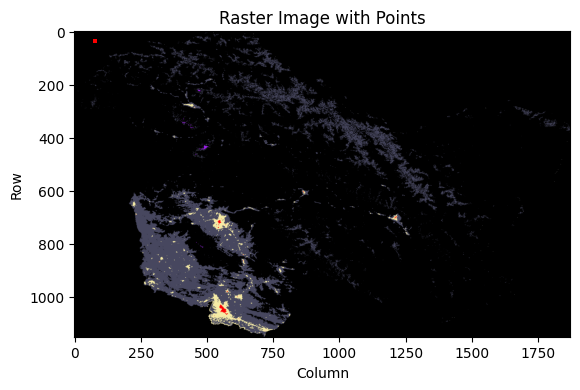

In [153]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Read the raster image
with rasterio.open("jkntltif.tif") as src:  # Replace with your raster file path
    raster_data = src.read()  # Read the raster data

# Generate some sample point coordinates (replace this with your actual points)


# Convert point coordinates to a GeoDataFrame
#points_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in point_coords], crs="EPSG:4326")

# Plot the raster image
plt.figure(figsize=(30, 30))
gdf.plot(marker='o', color='red', markersize=1)
plt.imshow(raster_data.transpose(1, 2, 0))  # Transpose for RGB representation (if applicable)
plt.title('Raster Image with Points')
plt.xlabel('Column')
plt.ylabel('Row')

# Plot the points on top of the raster image


plt.show()


District-wise mapping


In [154]:
india_district_map= gpd.read_file('india_district_boundary\india_district_boundary.shp')

In [155]:
india_district_map.to_csv('district_polygons.csv')

In [156]:
jnk_district_map=india_district_map[india_district_map['STATE']=='JAMMU   KASHMIR']
jnk_district_map.to_csv('jnk.csv')

In [157]:
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads

# Read the CSV file into a DataFrame
df = pd.read_csv('jnk.csv')

# Convert the 'geometry' column to Shapely geometry objects
df['geometry'] = df['geometry'].apply(loads)

# Create a GeoDataFrame
jnkgdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

# Save the GeoDataFrame to a shapefile
jnkgdf.to_file('jnk_shapefile.shp', driver='ESRI Shapefile')


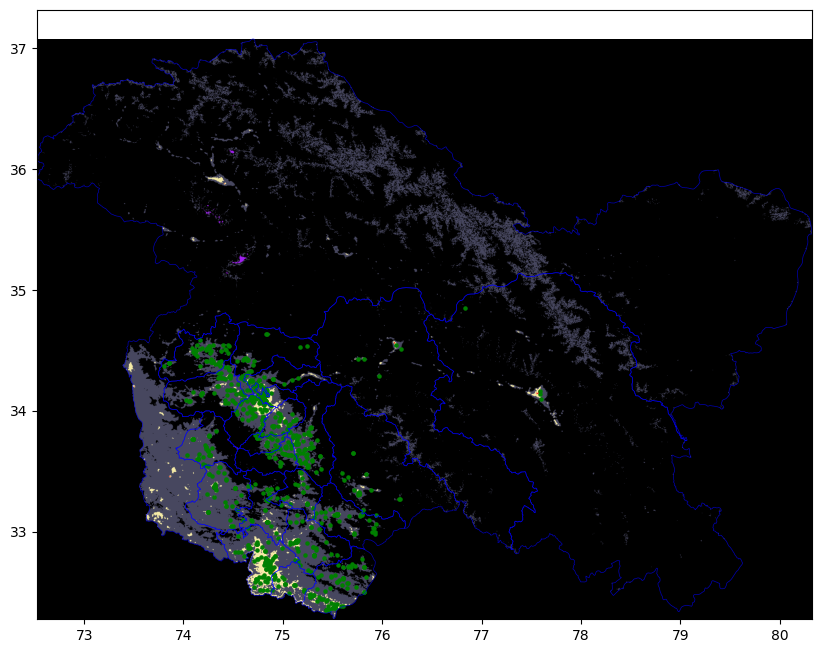

In [158]:
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

src = rasterio.open("jkntltif.tif")

districts_gdf = gpd.read_file("jnk_shapefile.shp")
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(10, 10))

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")
gdf.plot(ax=ax, markersize=5, marker='o', color='green')  # Adjust marker size and appearance
districts_gdf.plot(ax=ax,  linewidth=0.5, edgecolor='blue', alpha=0.7, facecolor='none')

plt.savefig('jnkNTL.svg')
#gdf.plot(ax=ax)

Loading NTL Countour Data

In [159]:
import geopandas as gpd

cntr= gpd.read_file('jnkcountour.shp')

#taking only 200 NTL data (urban areas)
cntr=cntr[cntr['ELEV']==200]
cntr

,fid,ID,ELEV,geometry
5,6.0,5,200.0,"LINESTRING (74.71965 37.04792, 74.71875 37.047..."
16,17.0,16,200.0,"LINESTRING (75.34465 37.02708, 75.34375 37.026..."
20,21.0,20,200.0,"LINESTRING (74.73215 37.02292, 74.73125 37.021..."
36,37.0,36,200.0,"LINESTRING (74.84465 36.99375, 74.84375 36.992..."
45,46.0,45,200.0,"LINESTRING (75.34882 36.98958, 75.34792 36.988..."
...,...,...,...,...
10138,10139.0,10138,200.0,"LINESTRING (75.44483 32.33958, 75.44375 32.338..."
10139,10140.0,10139,200.0,"LINESTRING (75.49483 32.33958, 75.49375 32.338..."
10143,10144.0,10143,200.0,"LINESTRING (75.41149 32.33125, 75.41042 32.330..."
10146,10147.0,10146,200.0,"LINESTRING (75.53202 32.31458, 75.53125 32.313..."


<Axes: >

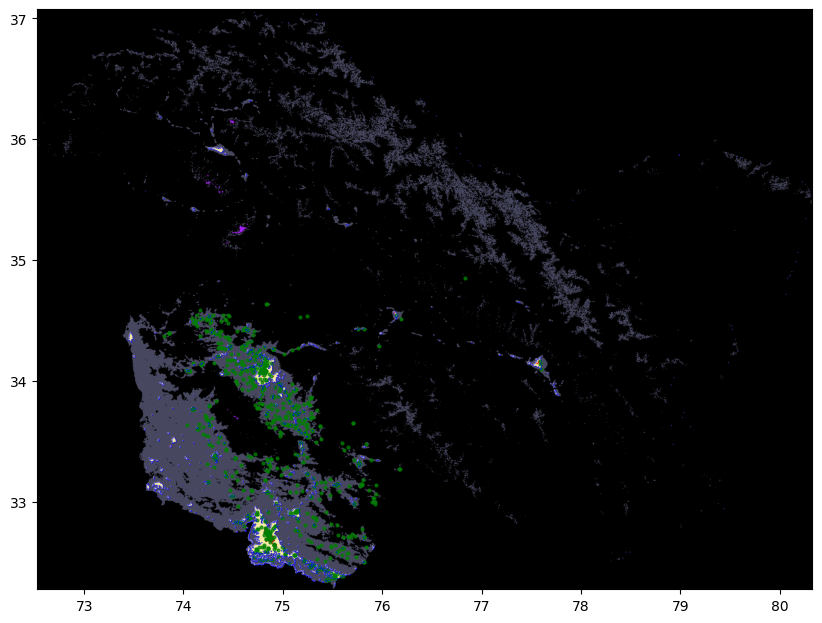

In [160]:
fig, ax = plt.subplots(figsize=(10, 10))

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")
gdf.plot(ax=ax, markersize=4, marker='o', color='green', alpha=0.7)  # Adjust marker size and appearance
cntr.plot(ax=ax,  linewidth=0.5, edgecolor='blue', alpha=0.7, facecolor='none')

#plt.savefig('jnkNTL.svg')
#gdf.plot(ax=ax)

In [161]:
is_closed = cntr['geometry'].iloc[0].is_closed
print("Is Linestring Closed:", is_closed)

Is Linestring Closed: True


In [162]:
from shapely.geometry import LineString, Polygon

cntr['geometry'] = cntr['geometry'].apply(lambda x: Polygon(x))

#cntr.to_csv('cntr.csv')
cntr

,fid,ID,ELEV,geometry
5,6.0,5,200.0,"POLYGON ((74.71965 37.04792, 74.71875 37.04702..."
16,17.0,16,200.0,"POLYGON ((75.34465 37.02708, 75.34375 37.02618..."
20,21.0,20,200.0,"POLYGON ((74.73215 37.02292, 74.73125 37.02167..."
36,37.0,36,200.0,"POLYGON ((74.84465 36.99375, 74.84375 36.99285..."
45,46.0,45,200.0,"POLYGON ((75.34882 36.98958, 75.34792 36.98868..."
...,...,...,...,...
10138,10139.0,10138,200.0,"POLYGON ((75.44483 32.33958, 75.44375 32.33851..."
10139,10140.0,10139,200.0,"POLYGON ((75.49483 32.33958, 75.49375 32.33851..."
10143,10144.0,10143,200.0,"POLYGON ((75.41149 32.33125, 75.41042 32.33017..."
10146,10147.0,10146,200.0,"POLYGON ((75.53202 32.31458, 75.53125 32.31351..."


Now Taking Points only inside the Urban Areas

In [163]:
joined_data = gpd.sjoin(gdf, cntr, how='inner', op='intersects')

# Print the resulting joined data
joined_data.to_csv('urbanpoints.csv')
joined_data

C:\Users\utfu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,geometry,index_right,fid,ID,ELEV
294,POINT (74.30890 33.37310),8818,8819.0,8818,200.0
7216,POINT (74.31320 33.37560),8818,8819.0,8818,200.0
11367,POINT (74.31350 33.36550),8818,8819.0,8818,200.0
12093,POINT (74.32720 33.34590),8818,8819.0,8818,200.0
12603,POINT (74.31430 33.37880),8818,8819.0,8818,200.0
...,...,...,...,...,...
67686,POINT (74.83990 33.74180),8034,8035.0,8034,200.0
67925,POINT (74.79990 33.95060),7599,7600.0,7599,200.0
67926,POINT (74.79980 33.95020),7599,7600.0,7599,200.0
71898,POINT (75.75440 34.43160),6543,6544.0,6543,200.0


Plotting the points inside the polygons

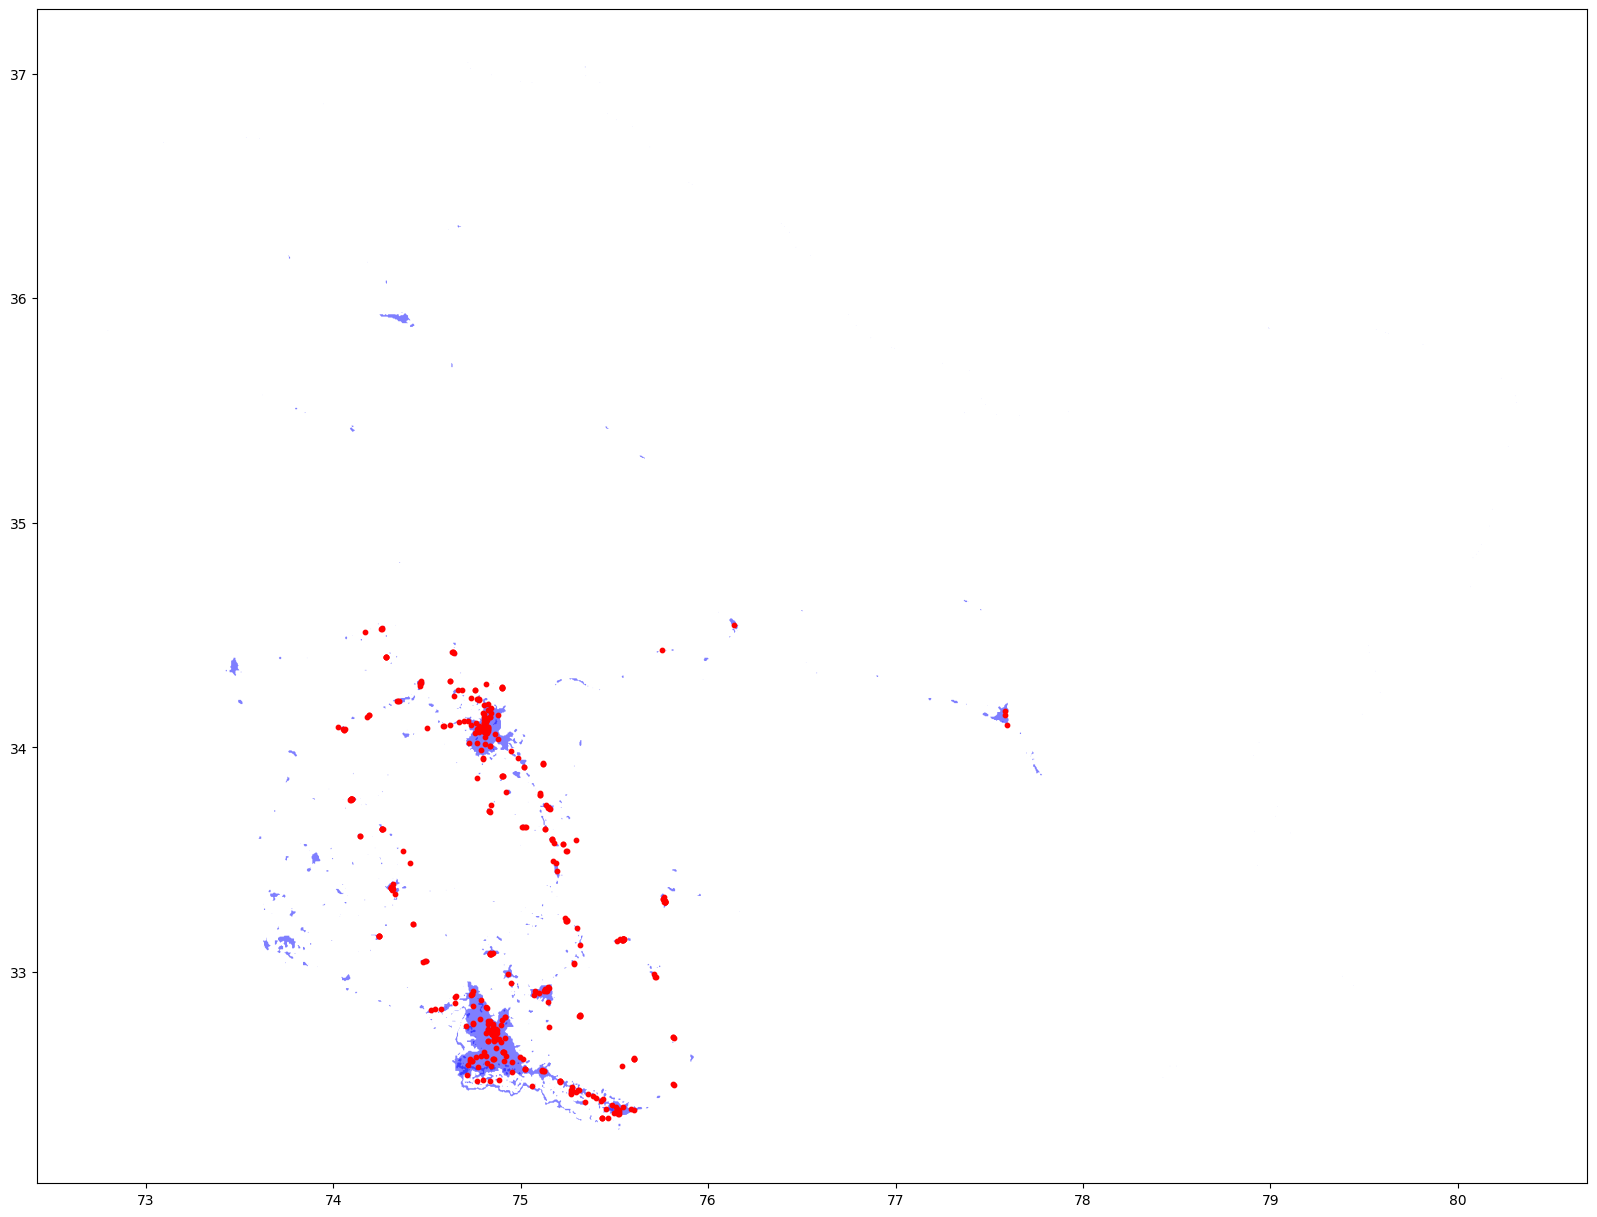

In [164]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the linestrings from cntr and points from gdf
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the linestrings
cntr.plot(ax=ax, color='blue', alpha=0.5)

# Plot the points
joined_data.plot(ax=ax, color='red', markersize=10)

plt.show()


Taking in Rural Points as (All points - Urban Points)

In [167]:
joined_data['geometry']

294      POINT (74.30890 33.37310)
7216     POINT (74.31320 33.37560)
11367    POINT (74.31350 33.36550)
12093    POINT (74.32720 33.34590)
12603    POINT (74.31430 33.37880)
                   ...            
67686    POINT (74.83990 33.74180)
67925    POINT (74.79990 33.95060)
67926    POINT (74.79980 33.95020)
71898    POINT (75.75440 34.43160)
74114    POINT (74.37080 33.53920)
Name: geometry, Length: 425, dtype: geometry

In [168]:
gdf['geometry']

127      POINT (75.88480 33.34890)
258      POINT (74.08880 34.52310)
294      POINT (74.30890 33.37310)
523      POINT (75.37320 33.62430)
525      POINT (74.82350 34.07150)
                   ...            
74145    POINT (75.38750 32.64350)
74288    POINT (74.66570 34.17450)
74419    POINT (75.52130 32.36680)
74900    POINT (75.00940 33.64510)
74944    POINT (74.69690 34.20980)
Name: geometry, Length: 814, dtype: geometry

In [ ]:
set1 = set(gdf['geometry'])
set2 = set(joined_data['geometry'])

# Find the difference between the two sets
disjoint_geometries = set1 - set2

disjoint_geometries

In [172]:
result_gdf = gpd.GeoDataFrame(geometry=list(disjoint_geometries))
result_gdf

,geometry
0,POINT (74.47540 34.22530)
1,POINT (75.92340 32.99880)
2,POINT (74.24850 33.67110)
3,POINT (74.42130 34.26550)
4,POINT (73.85770 34.39580)
...,...
383,POINT (74.26260 34.47520)
384,POINT (74.74280 33.77190)
385,POINT (74.34270 34.39090)
386,POINT (74.57810 34.27140)


In [ ]:
result_gdf.to_csv('ruralpoints.csv')
